# Combine data frames 
Started with two data frames, one for athletes stats and the other for fight stats.  Merged the two data frames and dropped the NaN rows.

Data found at: https://www.kaggle.com/rajeevw/ufcdata/download

In [1]:
#load file
from google.colab import files
upload = files.upload()

Saving ufcdata.zip to ufcdata.zip


In [2]:
#unzip required files (raw_fighter_data.csv & raw_total_fight_data.csv)
!unzip 'ufcdata.zip'

Archive:  ufcdata.zip
  inflating: data.csv                
  inflating: preprocessed_data.csv   
  inflating: raw_fighter_details.csv  
  inflating: raw_total_fight_data.csv  


In [0]:
#import tools
import pandas as pd
import numpy as np

In [5]:
#load athlete df and drop NaN roaws, and drop the reset index
athlete = pd.read_csv('raw_fighter_details.csv').dropna(subset=['Reach']).reset_index().drop('index', axis=1)

athlete.head()

,fighter_name,Height,Weight,Reach,Stance,DOB
0,Aaron Phillips,"5' 9""",135 lbs.,"70""",Southpaw,"Aug 05, 1989"
1,Aaron Riley,"5' 8""",155 lbs.,"69""",Southpaw,"Dec 09, 1980"
2,Aaron Rosa,"6' 4""",205 lbs.,"78""",Orthodox,"May 28, 1983"
3,Aaron Simpson,"6' 0""",170 lbs.,"73""",Orthodox,"Jul 20, 1974"
4,Abdul Razak Alhassan,"5' 10""",170 lbs.,"73""",Orthodox,"Aug 11, 1985"


In [6]:
#load fight df 
fight = pd.read_csv('raw_total_fight_data.csv', sep=';')

fight.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52%,47%,99 of 182,59 of 121,1 of 4,0 of 2,25%,0%,1,0,1,0,0,0,73 of 150,35 of 89,13 of 16,7 of 8,4 of 5,15 of 22,45 of 118,54 of 116,19 of 23,2 of 2,26 of 30,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,72%,16%,37 of 40,42 of 52,2 of 2,0 of 0,100%,0%,1,0,3,0,0,0,4 of 5,0 of 7,4 of 6,0 of 2,0 of 0,2 of 3,5 of 8,2 of 12,2 of 2,0 of 0,1 of 1,0 of 0,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko
2,Tony Ferguson,Donald Cerrone,0,0,104 of 200,68 of 185,52%,36%,104 of 200,68 of 185,0 of 0,1 of 1,0%,100%,0,0,0,0,0,0,65 of 144,43 of 152,25 of 37,15 of 23,14 of 19,10 of 10,103 of 198,68 of 184,1 of 2,0 of 1,0 of 0,0 of 0,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Lightweight Bout,Tony Ferguson
3,Jimmie Rivera,Petr Yan,0,2,73 of 192,56 of 189,38%,29%,76 of 195,58 of 192,0 of 3,1 of 3,0%,33%,0,0,0,1,0,0,42 of 145,40 of 166,15 of 24,13 of 19,16 of 23,3 of 4,60 of 173,42 of 167,9 of 15,10 of 12,4 of 4,4 of 10,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Kevin MacDonald,"June 08, 2019","Chicago, Illinois, USA",Bantamweight Bout,Petr Yan
4,Tai Tuivasa,Blagoy Ivanov,0,1,64 of 144,73 of 123,44%,59%,66 of 146,81 of 131,0 of 0,2 of 2,0%,100%,0,0,0,0,0,0,39 of 114,65 of 114,6 of 7,7 of 8,19 of 23,1 of 1,50 of 126,62 of 111,14 of 18,5 of 6,0 of 0,6 of 6,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Heavyweight Bout,Blagoy Ivanov


In [7]:
#create B_fighter and R_fighter column
athlete['B_fighter'] = athlete['fighter_name']
athlete['R_fighter'] = athlete['fighter_name']

athlete.head()

,fighter_name,Height,Weight,Reach,Stance,DOB,B_fighter,R_fighter
0,Aaron Phillips,"5' 9""",135 lbs.,"70""",Southpaw,"Aug 05, 1989",Aaron Phillips,Aaron Phillips
1,Aaron Riley,"5' 8""",155 lbs.,"69""",Southpaw,"Dec 09, 1980",Aaron Riley,Aaron Riley
2,Aaron Rosa,"6' 4""",205 lbs.,"78""",Orthodox,"May 28, 1983",Aaron Rosa,Aaron Rosa
3,Aaron Simpson,"6' 0""",170 lbs.,"73""",Orthodox,"Jul 20, 1974",Aaron Simpson,Aaron Simpson
4,Abdul Razak Alhassan,"5' 10""",170 lbs.,"73""",Orthodox,"Aug 11, 1985",Abdul Razak Alhassan,Abdul Razak Alhassan


In [8]:
#merge athlete and fight dfs on B_fighter
df1 = pd.merge(fight, athlete[['B_fighter', 'Height', 'Weight', 'Reach', 'Stance', 'DOB']], how='inner', on='B_fighter')

df1.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner,Height,Weight,Reach,Stance,DOB
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52%,47%,99 of 182,59 of 121,1 of 4,0 of 2,25%,0%,1,0,1,0,0,0,73 of 150,35 of 89,13 of 16,7 of 8,4 of 5,15 of 22,45 of 118,54 of 116,19 of 23,2 of 2,26 of 30,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
1,Raphael Assuncao,Marlon Moraes,0,1,2 of 12,10 of 23,16%,43%,3 of 13,12 of 25,0 of 0,0 of 0,0%,0%,0,1,0,2,0,0,1 of 10,8 of 17,0 of 0,0 of 2,1 of 2,2 of 4,2 of 12,7 of 18,0 of 0,0 of 0,0 of 0,3 of 5,Submission,1,3:17,5 Rnd (5-5-5-5-5),Jason Herzog,"February 02, 2019","Fortaleza, Ceara, Brazil",Bantamweight Bout,Marlon Moraes,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
2,Jimmie Rivera,Marlon Moraes,0,1,0 of 3,7 of 9,0%,77%,0 of 3,7 of 9,0 of 0,0 of 0,0%,0%,0,0,0,0,0,0,0 of 3,6 of 8,0 of 0,0 of 0,0 of 0,1 of 1,0 of 3,2 of 3,0 of 0,0 of 0,0 of 0,5 of 6,KO/TKO,1,0:33,5 Rnd (5-5-5-5-5),Dan Miragliotta,"June 01, 2018","Utica, New York, USA",Bantamweight Bout,Marlon Moraes,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
3,John Dodson,Marlon Moraes,1,0,43 of 105,45 of 131,40%,34%,47 of 109,45 of 131,2 of 4,1 of 2,50%,50%,0,1,0,0,0,0,24 of 83,21 of 92,15 of 18,15 of 23,4 of 4,9 of 16,40 of 101,45 of 131,2 of 3,0 of 0,1 of 1,0 of 0,Decision - Split,3,5:00,3 Rnd (5-5-5),Bill Bookwalter,"November 11, 2017","Norfolk, Virginia, USA",Bantamweight Bout,Marlon Moraes,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"
4,Raphael Assuncao,Marlon Moraes,0,0,43 of 134,44 of 150,32%,29%,43 of 134,44 of 150,0 of 1,0 of 2,0%,0%,0,0,0,0,0,0,21 of 95,15 of 113,4 of 13,14 of 20,18 of 26,15 of 17,42 of 132,44 of 149,1 of 2,0 of 1,0 of 0,0 of 0,Decision - Split,3,5:00,3 Rnd (5-5-5),Osiris Maia,"June 03, 2017","Rio de Janeiro, Rio de Janeiro, Brazil",Bantamweight Bout,Raphael Assuncao,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988"


In [0]:
#rename b_fighter stats
df1 = df1.rename(columns={'Height':'B_Height', 'Weight':'B_Weight', 'Reach':'B_Reach', 
                   'Stance':'B_Stance', 'DOB': 'B_DOB'})

In [0]:
#merge df1 with athlete on r_fighter
df2 = pd.merge(df1, athlete[['R_fighter', 'Height', 'Weight', 'Reach', 'Stance', 'DOB']], how='inner', on='R_fighter')

In [0]:
#rename R_fighter stats
df2 = df2.rename(columns={'Height':'R_Height', 'Weight':'R_Weight', 'Reach':'R_Reach', 
                   'Stance':'R_Stance', 'DOB': 'R_DOB'})

In [0]:
#drop NaN rows from df2
df2 = df2.dropna()

In [13]:
#inspect df2 head
df2.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner,B_Height,B_Weight,B_Reach,B_Stance,B_DOB,R_Height,R_Weight,R_Reach,R_Stance,R_DOB
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52%,47%,99 of 182,59 of 121,1 of 4,0 of 2,25%,0%,1,0,1,0,0,0,73 of 150,35 of 89,13 of 16,7 of 8,4 of 5,15 of 22,45 of 118,54 of 116,19 of 23,2 of 2,26 of 30,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988","5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"
1,Henry Cejudo,TJ Dillashaw,1,0,18 of 23,1 of 3,78%,33%,18 of 23,1 of 3,0 of 0,0 of 0,0%,0%,0,0,0,0,0,0,17 of 22,0 of 1,1 of 1,0 of 0,0 of 0,1 of 2,3 of 6,1 of 3,0 of 0,0 of 0,15 of 17,0 of 0,KO/TKO,1,0:32,5 Rnd (5-5-5-5-5),Kevin MacDonald,"January 19, 2019","Brooklyn, New York, USA",UFC Flyweight Title Bout,Henry Cejudo,"5' 6""",125 lbs.,"67""",Orthodox,"Feb 07, 1986","5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"
2,Henry Cejudo,Sergio Pettis,0,0,36 of 83,25 of 98,43%,25%,85 of 148,38 of 112,3 of 5,0 of 1,60%,0%,0,0,3,0,0,0,18 of 61,19 of 91,10 of 13,3 of 4,8 of 9,3 of 3,16 of 56,23 of 93,3 of 3,1 of 1,17 of 24,1 of 4,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Keith Peterson,"December 02, 2017","Detroit, Michigan, USA",Flyweight Bout,Henry Cejudo,"5' 6""",135 lbs.,"69""",Orthodox,"Aug 18, 1993","5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"
3,Henry Cejudo,Wilson Reis,1,0,34 of 58,5 of 25,58%,20%,39 of 64,5 of 25,2 of 2,0 of 1,100%,0%,0,0,0,0,0,0,24 of 47,4 of 24,7 of 8,0 of 0,3 of 3,1 of 1,24 of 41,5 of 25,2 of 3,0 of 0,8 of 14,0 of 0,KO/TKO,2,0:25,3 Rnd (5-5-5),Jerin Valel,"September 09, 2017","Edmonton, Alberta, Canada",Flyweight Bout,Henry Cejudo,"5' 4""",125 lbs.,"65""",Southpaw,"Jan 06, 1985","5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"
4,Henry Cejudo,Chico Camus,0,0,62 of 143,48 of 144,43%,33%,133 of 219,59 of 157,1 of 15,0 of 1,6%,0%,0,0,0,0,0,0,39 of 112,39 of 133,21 of 29,9 of 11,2 of 2,0 of 0,47 of 115,38 of 126,15 of 26,9 of 17,0 of 2,1 of 1,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mario Yamasaki,"June 13, 2015","Mexico City, Distrito Federal, Mexico",Flyweight Bout,Henry Cejudo,"5' 6""",125 lbs.,"66""",Orthodox,"Jan 26, 1985","5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987"


In [14]:
#check df2 shape
df2.shape

(4092, 51)

# Clean the data frame

In [0]:
#split r_sig_str into two usable columns
R_SIG_STR = df2['R_SIG_STR.'].str.split(' of ', n = 1, expand=True)

df2['r_sig_str_land'] = R_SIG_STR[0]

df2['r_sig_str_att'] = R_SIG_STR[1]

df2 = df2.drop('R_SIG_STR.', axis=1)

In [0]:
#split b_sig_str into two usable columns
B_SIG_STR = df2['B_SIG_STR.'].str.split(' of ', n = 1, expand=True)

df2['b_sig_str_land'] = B_SIG_STR[0]

df2['b_sig_str_att'] = B_SIG_STR[1]

df2 = df2.drop('B_SIG_STR.', axis=1)

In [0]:
#split two more columns into usable columns
r_total_str = df2['R_TOTAL_STR.'].str.split(' of ', n = 1, expand=True)

df2['r_tot_str_land'] = r_total_str[0]

df2['r_tot_str_att'] = r_total_str[1]

b_total_str = df2['B_TOTAL_STR.'].str.split(' of ', n = 1, expand=True)

df2['b_tot_str_land'] = b_total_str[0]

df2['b_tot_str_att'] = b_total_str[1]

df2 = df2.drop(['B_TOTAL_STR.', 'R_TOTAL_STR.'], axis=1)

In [0]:
#create copy of df
df3 = df2

In [19]:
#split another two columns into usable columns
r_td = df3['R_TD'].str.split(' of ', n = 1, expand=True)

df3['r_td_comp'] = r_td[0]

df3['r_td_att'] = r_td[1]

b_td = df3['B_TD'].str.split(' of ', n = 1, expand=True)

df3['b_td_comp'] = b_td[0]

df3['b_td_att'] = b_td[1]

df3.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR_pct,B_SIG_STR_pct,R_TD,B_TD,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,R_PASS,B_PASS,R_REV,B_REV,R_HEAD,B_HEAD,R_BODY,B_BODY,R_LEG,B_LEG,R_DISTANCE,B_DISTANCE,R_CLINCH,B_CLINCH,R_GROUND,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner,B_Height,B_Weight,B_Reach,B_Stance,B_DOB,R_Height,R_Weight,R_Reach,R_Stance,R_DOB,r_sig_str_land,r_sig_str_att,b_sig_str_land,b_sig_str_att,r_tot_str_land,r_tot_str_att,b_tot_str_land,b_tot_str_att,r_td_comp,r_td_att,b_td_comp,b_td_att
0,Henry Cejudo,Marlon Moraes,0,0,52%,47%,1 of 4,0 of 2,25%,0%,1,0,1,0,0,0,73 of 150,35 of 89,13 of 16,7 of 8,4 of 5,15 of 22,45 of 118,54 of 116,19 of 23,2 of 2,26 of 30,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo,"5' 6""",135 lbs.,"67""",Orthodox,"Apr 26, 1988","5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987",90,171,57,119,99,182,59,121,1,4,0,2
1,Henry Cejudo,TJ Dillashaw,1,0,78%,33%,0 of 0,0 of 0,0%,0%,0,0,0,0,0,0,17 of 22,0 of 1,1 of 1,0 of 0,0 of 0,1 of 2,3 of 6,1 of 3,0 of 0,0 of 0,15 of 17,0 of 0,KO/TKO,1,0:32,5 Rnd (5-5-5-5-5),Kevin MacDonald,"January 19, 2019","Brooklyn, New York, USA",UFC Flyweight Title Bout,Henry Cejudo,"5' 6""",125 lbs.,"67""",Orthodox,"Feb 07, 1986","5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987",18,23,1,3,18,23,1,3,0,0,0,0
2,Henry Cejudo,Sergio Pettis,0,0,43%,25%,3 of 5,0 of 1,60%,0%,0,0,3,0,0,0,18 of 61,19 of 91,10 of 13,3 of 4,8 of 9,3 of 3,16 of 56,23 of 93,3 of 3,1 of 1,17 of 24,1 of 4,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Keith Peterson,"December 02, 2017","Detroit, Michigan, USA",Flyweight Bout,Henry Cejudo,"5' 6""",135 lbs.,"69""",Orthodox,"Aug 18, 1993","5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987",36,83,25,98,85,148,38,112,3,5,0,1
3,Henry Cejudo,Wilson Reis,1,0,58%,20%,2 of 2,0 of 1,100%,0%,0,0,0,0,0,0,24 of 47,4 of 24,7 of 8,0 of 0,3 of 3,1 of 1,24 of 41,5 of 25,2 of 3,0 of 0,8 of 14,0 of 0,KO/TKO,2,0:25,3 Rnd (5-5-5),Jerin Valel,"September 09, 2017","Edmonton, Alberta, Canada",Flyweight Bout,Henry Cejudo,"5' 4""",125 lbs.,"65""",Southpaw,"Jan 06, 1985","5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987",34,58,5,25,39,64,5,25,2,2,0,1
4,Henry Cejudo,Chico Camus,0,0,43%,33%,1 of 15,0 of 1,6%,0%,0,0,0,0,0,0,39 of 112,39 of 133,21 of 29,9 of 11,2 of 2,0 of 0,47 of 115,38 of 126,15 of 26,9 of 17,0 of 2,1 of 1,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Mario Yamasaki,"June 13, 2015","Mexico City, Distrito Federal, Mexico",Flyweight Bout,Henry Cejudo,"5' 6""",125 lbs.,"66""",Orthodox,"Jan 26, 1985","5' 4""",135 lbs.,"64""",Orthodox,"Feb 09, 1987",62,143,48,144,133,219,59,157,1,15,0,1


In [0]:
#drop unusable columns
df3 = df3.drop(['R_TD', 'B_TD'], axis=1)

In [0]:
#for loop to mass split unusable columns
for column in ['R_HEAD', 'B_HEAD', 'R_BODY', 'B_BODY', 'R_LEG', 'B_LEG', 
               'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH', 'B_CLINCH', 'R_GROUND', 
               'B_GROUND']:

  y = df3[column].str.split(' of ')

  ls1 = []
  ls2 = []

  for x in y:

    ls1.append(x[0])

    ls2.append(x[1])

  df3[f'{column}_LAND'] = pd.Series(ls1)

  df3[f'{column}_ATT'] = pd.Series(ls2)

In [0]:
#drop remaining unusable columns
df3 = df3.drop(['R_HEAD', 'B_HEAD', 'R_BODY', 'B_BODY', 'R_LEG', 'B_LEG', 
               'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH', 'B_CLINCH', 'R_GROUND', 
               'B_GROUND'], axis=1)

In [23]:
#check shape
df3.shape

(4092, 69)

In [0]:
#create a copy of the df
df4 = df3

In [0]:
#strip % from columns
for c in ['R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct']:
  df4[c] = df4[c].str.strip('%')

In [0]:
# cast the str columns to int
for s in ['R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct']:
  df4[s] = int(df4[s][0])*.01

In [0]:
#drop unneeded columns
df4 = df4.drop(['Referee', 'location'], axis=1)

In [0]:
#create df w/ all red corner winners
red_w = df4[df4['R_fighter'] == df4['Winner']]

In [0]:
#create a df w/ all blue corner winners
blue_w = df4[df4['B_fighter'] == df4['Winner']]

In [0]:
#reset red_w index
red_w = red_w.reset_index().drop('index', axis=1)

In [0]:
#reset blue_w index
blue_w = blue_w.reset_index().drop('index', axis=1)

In [0]:
# spare my pinky from the shift key/caps lock
blue_w.columns = blue_w.columns.str.lower()

In [0]:
#create function to rename column headers first two charaacters
def swap_first(data, replace, replaced):
  for col in data.columns:
    if col[:2] == replace:
     data = data.rename(columns={col: f'{replaced}{col[2:]}'})
  return data

In [0]:
#swap w_ for b_ 
blue_w = swap_first(blue_w, 'b_', 'w_')

In [0]:
#swap r_ for l_
blue_w = swap_first(blue_w, 'r_', 'l_')

In [0]:
#save my pinky form the shift/capslock key
red_w.columns = red_w.columns.str.lower()

In [0]:
#swap r_ for w_
red_w = swap_first(red_w, 'r_', 'w_')

In [0]:
#swap b_ for l_ 
red_w = swap_first(red_w,'b_', 'l_')

In [39]:
#check shape
red_w.shape

(2639, 67)

In [40]:
#check shape
blue_w.shape

(1453, 67)

In [0]:
#merge the red and blue df into winner df
winner = pd.merge(blue_w, red_w, how='outer')

In [0]:
#mass change columns w/ str to numbers
winner = winner.apply(pd.to_numeric, errors='ignore')

In [50]:
#check height column
winner['w_height'].head()

0    5' 6"
1    5' 6"
2    5' 7"
3    5' 7"
4    5' 6"
Name: w_height, dtype: object

In [0]:
#create function to turn height into int of inches
def ht2int(cell):
  
  ft, inch = cell.split("'")

  return 12*int(ft) + int(inch.strip('"').strip())

In [0]:
#apply ht2int to w_height

winner['w_height'] = winner['w_height'].apply(ht2int)

In [0]:
#apply ht2int to l_height
winner['l_height'] = winner['l_height'].apply(ht2int)


In [0]:
#import tool
import datetime

In [0]:
#l_dob converted to datetime format
winner['l_dob'] = winner['l_dob'].apply(pd.to_datetime)

In [0]:
#w_dob  converted to datetime format
winner['w_dob'] = winner['w_dob'].apply(pd.to_datetime)

In [0]:
#date  converted to datetime format
winner['date'] = winner['date'].apply(pd.to_datetime)

In [0]:
#convert l_weight to int
winner['l_weight'] = pd.to_numeric(winner['l_weight'].str.strip(' lbs.'))

In [0]:
#convert w_weight to int
winner['w_weight'] = pd.to_numeric(winner['w_weight'].str.strip(' lbs.'))

In [0]:
#create function to convert round time to seconds int
def get_sec(time):
  m, s = pd.to_numeric(time.split(':'))
  return m*60 + s

In [0]:
#apply get_sec to last round time
winner['last_round_time'] = winner['last_round_time'].apply(get_sec)

In [0]:
#create total time column
winner['total_time'] = (winner['last_round']-1) * 300 + winner['last_round_time']

In [0]:
#convert w_reach to int
winner['w_reach'] = pd.to_numeric(winner['w_reach'].str.strip('"'))

In [0]:
#convert l reach to int
winner['l_reach'] = pd.to_numeric(winner['l_reach'].str.strip('"'))

In [0]:
#create stance match column
winner['stance_match'] = winner['w_stance'] == winner['l_stance']

In [0]:
#create winnner ht advantage column
winner['w_reach_advantage'] = winner['w_reach'] - winner['l_reach']

# Explore the Data

In [0]:
#create copy of primary df
copy = winner

In [0]:
#create advantage columns for most statistics
for col in copy.columns.tolist():
  if 'w_' in col[:2] or 'l_' in col[:2]:
    try: 
      copy[f'adv_{col[2:]}'] = copy[f'w_{col[2:]}'].astype(int) - copy[f'l_{col[2:]}'].astype(int)
    except:
      pass

In [70]:
#drop adv_dob
copy =  copy.drop('adv_dob', axis = 1)

copy.head()

,l_fighter,w_fighter,l_kd,w_kd,l_sig_str_pct,w_sig_str_pct,l_td_pct,w_td_pct,l_sub_att,w_sub_att,l_pass,w_pass,l_rev,w_rev,win_by,last_round,last_round_time,format,date,fight_type,winner,w_height,w_weight,w_reach,w_stance,w_dob,l_height,l_weight,l_reach,l_stance,l_dob,l_sig_str_land,l_sig_str_att,w_sig_str_land,w_sig_str_att,l_tot_str_land,l_tot_str_att,w_tot_str_land,w_tot_str_att,l_td_comp,l_td_att,w_td_comp,w_td_att,l_head_land,l_head_att,w_head_land,w_head_att,l_body_land,l_body_att,w_body_land,w_body_att,l_leg_land,l_leg_att,w_leg_land,w_leg_att,l_distance_land,l_distance_att,w_distance_land,w_distance_att,l_clinch_land,l_clinch_att,w_clinch_land,w_clinch_att,l_ground_land,l_ground_att,w_ground_land,w_ground_att,total_time,stance_match,w_reach_advantage,adv_kd,adv_sig_str_pct,adv_td_pct,adv_sub_att,adv_pass,adv_rev,adv_height,adv_weight,adv_reach,adv_sig_str_land,adv_sig_str_att,adv_tot_str_land,adv_tot_str_att,adv_td_comp,adv_td_att
0,Raphael Assuncao,Marlon Moraes,0,1,0.52,0.47,0.25,0.0,0,1,0,2,0,0,Submission,1,197,5 Rnd (5-5-5-5-5),2019-02-02,Bantamweight Bout,Marlon Moraes,66,135,67,Orthodox,1988-04-26,65,135,66,Orthodox,1982-07-19,2,12,10,23,3,13,12,25,0,0,0,0,1.0,10.0,8.0,17.0,0.0,0.0,0.0,2.0,1.0,2.0,2.0,4.0,2.0,12.0,7.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,197,True,1,1,0,0,1,2,0,1,0,1,8,11,9,12,0,0
1,Jimmie Rivera,Marlon Moraes,0,1,0.52,0.47,0.25,0.0,0,0,0,0,0,0,KO/TKO,1,33,5 Rnd (5-5-5-5-5),2018-06-01,Bantamweight Bout,Marlon Moraes,66,135,67,Orthodox,1988-04-26,64,135,68,Orthodox,1989-06-29,0,3,7,9,0,3,7,9,0,0,0,0,0.0,3.0,6.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,33,True,-1,1,0,0,0,0,0,2,0,-1,7,6,7,6,0,0
2,Jimmie Rivera,Petr Yan,0,2,0.52,0.47,0.25,0.0,0,0,0,1,0,0,Decision - Unanimous,3,300,3 Rnd (5-5-5),2019-06-08,Bantamweight Bout,Petr Yan,67,135,67,Switch,1993-02-11,64,135,68,Orthodox,1989-06-29,73,192,56,189,76,195,58,192,0,3,1,3,42.0,145.0,40.0,166.0,15.0,24.0,13.0,19.0,16.0,23.0,3.0,4.0,60.0,173.0,42.0,167.0,9.0,15.0,10.0,12.0,4.0,4.0,4.0,10.0,900,False,-1,2,0,0,0,1,0,3,0,-1,-17,-3,-18,-3,1,0
3,Jimmie Rivera,Aljamain Sterling,0,0,0.52,0.47,0.25,0.0,0,0,1,0,0,0,Decision - Unanimous,3,300,3 Rnd (5-5-5),2019-02-17,Bantamweight Bout,Aljamain Sterling,67,135,71,Orthodox,1989-07-31,64,135,68,Orthodox,1989-06-29,24,84,101,176,36,97,129,206,0,0,0,7,8.0,59.0,36.0,96.0,7.0,16.0,39.0,51.0,9.0,9.0,26.0,29.0,17.0,77.0,77.0,146.0,7.0,7.0,23.0,29.0,0.0,0.0,1.0,1.0,900,True,3,0,0,0,0,-1,0,3,0,3,77,92,93,109,0,7
4,John Dodson,Marlon Moraes,1,0,0.52,0.47,0.25,0.0,0,1,0,0,0,0,Decision - Split,3,300,3 Rnd (5-5-5),2017-11-11,Bantamweight Bout,Marlon Moraes,66,135,67,Orthodox,1988-04-26,63,135,66,Orthodox,1984-09-26,43,105,45,131,47,109,45,131,2,4,1,2,24.0,83.0,21.0,92.0,15.0,18.0,15.0,23.0,4.0,4.0,9.0,16.0,40.0,101.0,45.0,131.0,2.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,900,True,1,-1,0,0,1,0,0,3,0,1,2,26,-2,22,-1,-2


In [71]:
#check shape of df
copy.shape

(4092, 85)

In [0]:
#drop NaN columns
copy = copy.dropna()

In [0]:
#import more tools
import seaborn as sns
import matplotlib.pyplot as plt

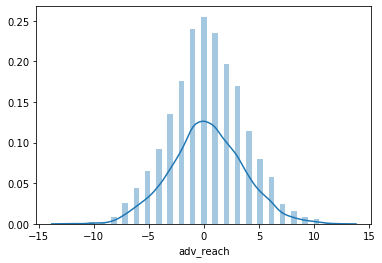

In [74]:
#create distplot of reach advantage
sns.distplot(copy['adv_reach'])

In [75]:
#calculate mean of adv_reach
np.mean(copy['adv_reach'])

0.28511309836927934

In [76]:
#calculate std of adv_reach
np.std(copy['adv_reach'])

3.297574443792494

In [77]:
#check when fights data starts and ends
copy['date'].describe()

count                    3802
unique                    445
top       2016-11-19 00:00:00
freq                       24
first     1997-10-17 00:00:00
last      2019-06-08 00:00:00
Name: date, dtype: object

In [0]:
#create reach_df contains only fights with a significant reach adv for winner
reach_df = copy[copy['adv_reach'] <= (np.mean(copy['adv_reach'])-np.std(copy['adv_reach'])*2)]

In [106]:
#review reach disadvantaged stats summary
reach_df.describe()

,l_kd,w_kd,l_sig_str_pct,w_sig_str_pct,l_td_pct,w_td_pct,l_sub_att,w_sub_att,l_pass,w_pass,l_rev,w_rev,last_round,last_round_time,w_height,w_weight,w_reach,l_height,l_weight,l_reach,l_sig_str_land,l_sig_str_att,w_sig_str_land,w_sig_str_att,l_tot_str_land,l_tot_str_att,w_tot_str_land,w_tot_str_att,l_td_comp,l_td_att,w_td_comp,w_td_att,l_head_land,l_head_att,w_head_land,w_head_att,l_body_land,l_body_att,w_body_land,w_body_att,l_leg_land,l_leg_att,w_leg_land,w_leg_att,l_distance_land,l_distance_att,w_distance_land,w_distance_att,l_clinch_land,l_clinch_att,w_clinch_land,w_clinch_att,l_ground_land,l_ground_att,w_ground_land,w_ground_att,total_time,w_reach_advantage,adv_kd,adv_sig_str_pct,adv_td_pct,adv_sub_att,adv_pass,adv_rev,adv_height,adv_weight,adv_reach,adv_sig_str_land,adv_sig_str_att,adv_tot_str_land,adv_tot_str_att,adv_td_comp,adv_td_att
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.00000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.00000,75.00000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.0,75.0,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,0.066667,0.506667,0.486667,0.503333,0.083333,0.166667,0.32000,0.586667,0.506667,2.440000,0.186667,0.120000,2.266667,221.786667,69.453333,184.733333,70.093333,74.026667,189.146667,77.720000,24.440000,64.506667,35.333333,68.280000,37.320000,78.80000,58.36000,94.426667,0.506667,2.200000,1.600000,3.266667,23.893333,75.893333,26.320000,75.960000,6.293333,9.426667,7.760000,10.866667,4.986667,5.986667,6.720000,8.026667,25.200000,76.173333,31.773333,81.773333,5.066667,7.413333,5.280000,7.840000,4.906667,7.720000,3.746667,5.240000,601.786667,-7.626667,0.440000,0.0,0.0,0.266667,1.933333,-0.066667,-4.573333,-4.413333,-7.626667,10.893333,3.773333,21.040000,15.626667,1.093333,1.066667
std,0.251124,0.742045,0.023729,0.023729,0.118645,0.118645,0.85677,0.987672,1.245243,3.288966,0.511842,0.366134,1.142938,83.263874,2.914518,41.827294,3.259802,3.766758,41.703488,3.577558,25.719506,67.856441,28.359818,58.184135,33.871841,73.12226,45.06561,71.688360,1.070152,3.149432,2.301586,4.087996,22.509201,69.324262,34.908436,77.922595,6.084480,9.249066,9.105745,11.952986,6.207000,7.325434,8.406175,9.869381,27.131312,77.917381,42.010801,86.418150,5.628915,7.617713,5.883003,8.491713,7.233879,12.316282,6.804397,9.914281,387.741077,1.124342,0.825931,0.0,0.0,1.154701,3.508035,0.445195,2.542468,12.094329,1.124342,14.970758,27.215642,32.381359,44.518679,2.521118,4.979236
min,0.000000,0.000000,0.470000,0.470000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,61.000000,115.000000,62.000000,67.000000,125.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,-12.000000,-1.000000,0.0,0.0,-3.000000,-6.000000,-3.000000,-13.000000,-30.000000,-12.000000,-39.000000,-75.000000,-51.000000,-89.000000,-3.000000,-10.000000
25%,0.000000,0.000000,0.470000,0.470000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,171.000000,67.000000,155.000000,68.000000,72.000000,155.000000,75.000000,6.000000,18.000000,15.500000,24.000000,8.500000,20.00000,24.50000,41.500000,0.000000,0.000000,0.000000,0.000000,10.000000,26.000000,6.000000,24.000000,1.000000,3.000000,2.000000,3.500000,1

In [107]:
#review reach copy stats summary
copy.describe()

,l_kd,w_kd,l_sig_str_pct,w_sig_str_pct,l_td_pct,w_td_pct,l_sub_att,w_sub_att,l_pass,w_pass,l_rev,w_rev,last_round,last_round_time,w_height,w_weight,w_reach,l_height,l_weight,l_reach,l_sig_str_land,l_sig_str_att,w_sig_str_land,w_sig_str_att,l_tot_str_land,l_tot_str_att,w_tot_str_land,w_tot_str_att,l_td_comp,l_td_att,w_td_comp,w_td_att,l_head_land,l_head_att,w_head_land,w_head_att,l_body_land,l_body_att,w_body_land,w_body_att,l_leg_land,l_leg_att,w_leg_land,w_leg_att,l_distance_land,l_distance_att,w_distance_land,w_distance_att,l_clinch_land,l_clinch_att,w_clinch_land,w_clinch_att,l_ground_land,l_ground_att,w_ground_land,w_ground_att,total_time,w_reach_advantage,adv_kd,adv_sig_str_pct,adv_td_pct,adv_sub_att,adv_pass,adv_rev,adv_height,adv_weight,adv_reach,adv_sig_str_land,adv_sig_str_att,adv_tot_str_land,adv_tot_str_att,adv_td_comp,adv_td_att
count,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.00000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.0,3802.0,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000,3802.000000
mean,0.070226,0.391899,0.487793,0.502207,0.088966,0.161034,0.272488,0.523935,0.487901,1.716728,0.123619,0.140452,2.383745,228.529195,70.492635,169.415834,72.398474,70.403735,168.559179,72.113361,27.238296,72.249605,42.108890,90.416097,40.268806,86.793793,64.062862,115.286954,0.667280,2.576013,1.529984,3.292741,21.135455,62.807470,22.298001,62.968964,6.768806,10.01657,7.052078,10.316938,5.573119,7.048396,5.589164,7.020779,23.226723,64.685166,23.651499,63.804577,5.387954,7.950289,5.658864,8.288269,4.862704,7.236981,5.628880,8.213835,643.652814,0.285113,0.321673,0.0,0.0,0.251447,1.228827,0.016833,0.088901,0.856654,0.285113,14.870594,18.166491,23.794056,28.493161,0.862704,0.716728
std,0.278233,0.616375,0.023942,0.023942,0.119709,0.119709,0.730387,0.917875,1.116232,2.511846,0.407732,0.418274,1.004216,91.204829,3.422164,33.638027,4.144500,3.351906,33.382034,3.944302,24.084872,62.726947,31.918441,70.268467,33.058602,68.134920,46.143457,79.231440,1.176606,3.474511,2.040957,3.948537,20.113433,55.025686,20.694082,54.224446,7.623745,10.69195,7.888090,10.977712,7.222480,8.940228,7.412424,9.250374,24.709118,63.148727,25.186686,62.540140,7.455856,10.372839,8.174861,11.260308,8.683877,12.834255,9.954796,14.304163,359.408394,3.298008,0.687314,0.0,0.0,1.127917,2.699787,0.469799,2.537483,11.066146,3.298008,22.147329,39.846494,40.073412,56.134845,2.429448,5.522619
min,0.000000,0.000000,0.470000,0.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,60.000000,115.000000,60.000000,60.000000,115.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,-12.000000,-3.000000,0.0,0.0,-7.000000,-11.000000,-3.000000,-13.000000,-75.000000,-12.000000,-84.000000,-318.000000,-256.000000,-339.000000,-11.000000,-27.000000
25%,0.000000,0.000000,0.470000,0.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,156.000000,68.000000,145.000000,70.000000,68.000000,145.000000,70.000000,9.000000,23.000000,18.000000

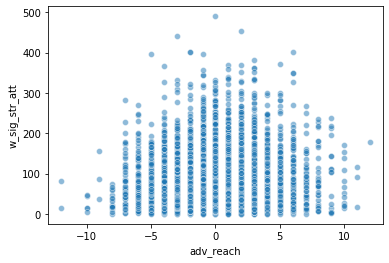

In [79]:
#check sig strikes realative to reach adv
fig, ax =plt.subplots()
sns.scatterplot(y=copy['w_sig_str_att'], x=copy['adv_reach'], alpha=.5)
ax.set_xlim(-13,13)
fig.show()

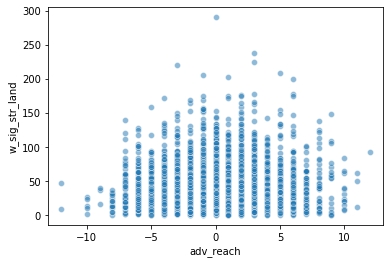

In [80]:
#check winners sig strikes landed realative to reach
fig, ax =plt.subplots()
sns.scatterplot(y=copy['w_sig_str_land'], x=copy['adv_reach'], alpha=.5)
ax.set_xlim(-13,13)
fig.show()

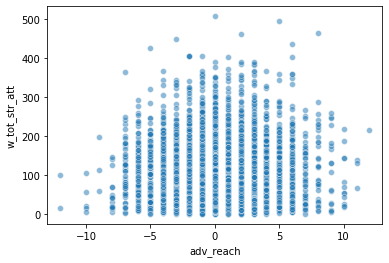

In [81]:
#check winers total strikes relative to reach
fig, ax =plt.subplots()
sns.scatterplot(y=copy['w_tot_str_att'], x=copy['adv_reach'], alpha=.5)
ax.set_xlim(-13,13)
fig.show()

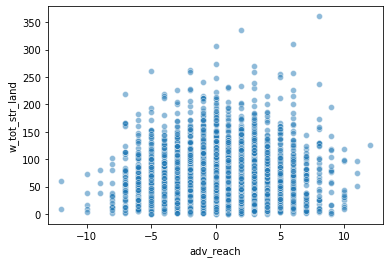

In [82]:
#check total strikes relative to reach
fig, ax =plt.subplots()
sns.scatterplot(y=copy['w_tot_str_land'], x=copy['adv_reach'], alpha=.5)
ax.set_xlim(-13,13)
fig.show()

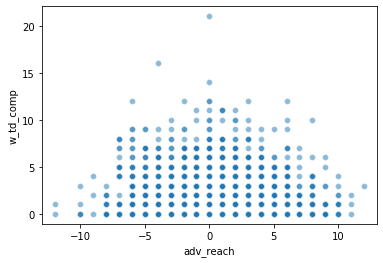

In [83]:
#check take downs by winner relative to reach
fig, ax =plt.subplots()
sns.scatterplot(y=copy['w_td_comp'], x=copy['adv_reach'], alpha=.5)
ax.set_xlim(-13,13)
fig.show()

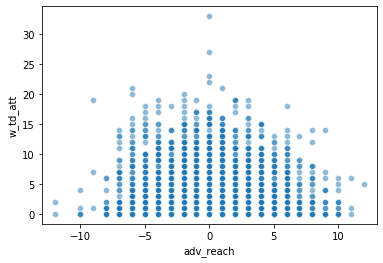

In [84]:
#check td attempted relavtive to reach
fig, ax =plt.subplots()
sns.scatterplot(y=copy['w_td_att'], x=copy['adv_reach'], alpha=.5)
ax.set_xlim(-13,13)
fig.show()

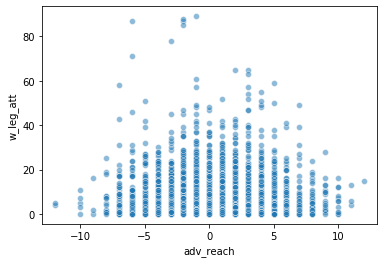

In [85]:
#check leg attacks relative to reach adv
fig, ax =plt.subplots()
sns.scatterplot(y=copy['w_leg_att'], x=copy['adv_reach'], alpha=.5)
ax.set_xlim(-13,13)
fig.show()

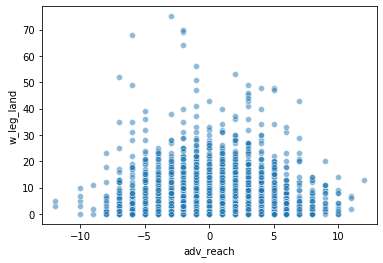

In [86]:
#check leg strieks that landed relative to reach adv
fig, ax =plt.subplots()
sns.scatterplot(y=copy['w_leg_land'], x=copy['adv_reach'], alpha=.5)
ax.set_xlim(-13,13)
fig.show()

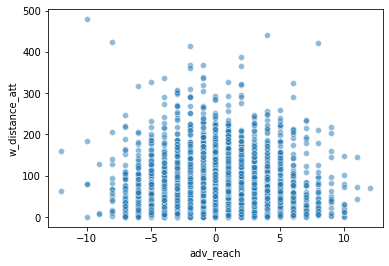

In [87]:
#check distance attackes relative to reach adv
fig, ax =plt.subplots()
sns.scatterplot(y=copy['w_distance_att'], x=copy['adv_reach'], alpha=.5)
ax.set_xlim(-13,13)
fig.show()

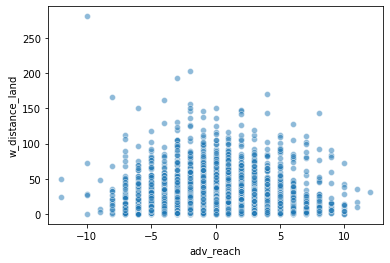

In [88]:
#check distance strikes that landed relative to reach
fig, ax =plt.subplots()
sns.scatterplot(y=copy['w_distance_land'], x=copy['adv_reach'], alpha=.5)
ax.set_xlim(-13,13)
fig.show()

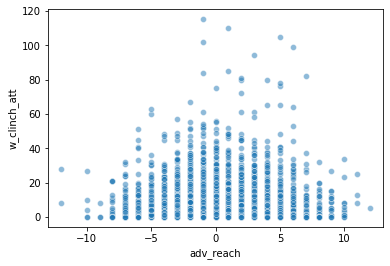

In [89]:
#check clinch attacks relative to reach
fig, ax =plt.subplots()
sns.scatterplot(y=copy['w_clinch_att'], x=copy['adv_reach'], alpha=.5)
ax.set_xlim(-13,13)
fig.show()

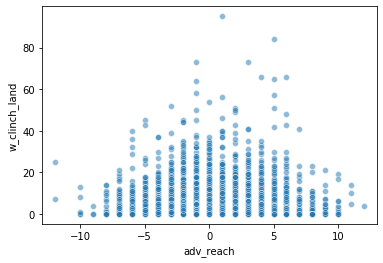

In [90]:
#check clinch strikes that landed relative to reach adv
fig, ax =plt.subplots()
sns.scatterplot(y=copy['w_clinch_land'], x=copy['adv_reach'], alpha=.5)
ax.set_xlim(-13,13)
fig.show()

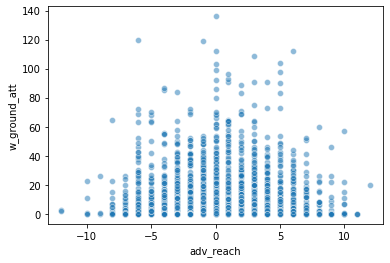

In [91]:
#check ground attacks relative to reach
fig, ax =plt.subplots()
sns.scatterplot(y=copy['w_ground_att'], x=copy['adv_reach'], alpha=.5)
ax.set_xlim(-13,13)
fig.show()

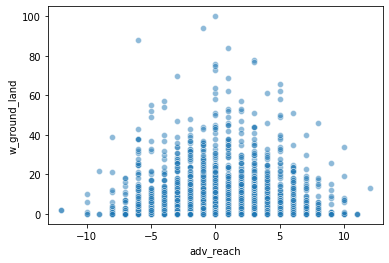

In [92]:
#check ground strikes relative to reach
fig, ax =plt.subplots()
sns.scatterplot(y=copy['w_ground_land'], x=copy['adv_reach'], alpha=.5)
ax.set_xlim(-13,13)
fig.show()

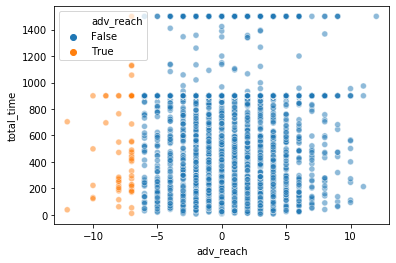

In [0]:
#check duration of bout relative to reach adv
fig, ax =plt.subplots()
sns.scatterplot(y=copy['total_time'], x=copy['adv_reach'], 
                hue=(copy['adv_reach'] <= -np.std(copy['adv_reach'])*2), 
                alpha=.5)
ax.set_xlim(-13,13)
fig.show()

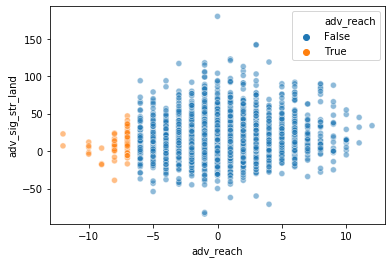

In [93]:
#check adv winner strieks relative to reach
fig, ax =plt.subplots()
sns.scatterplot(y=copy['adv_sig_str_land'], x=copy['adv_reach'], 
                hue=(copy['adv_reach'] <= -np.std(copy['adv_reach'])*2), 
                alpha=.5)
ax.set_xlim(-13,13)
fig.show()

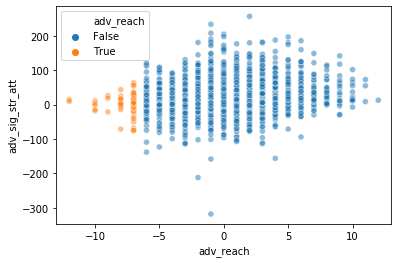

In [94]:
#check adv winner sig str attempted relative to reach
fig, ax =plt.subplots()
sns.scatterplot(y=copy['adv_sig_str_att'], x=copy['adv_reach'], 
                hue=(copy['adv_reach'] <= -np.std(copy['adv_reach'])*2), 
                alpha=.5)
ax.set_xlim(-13,13)
fig.show()

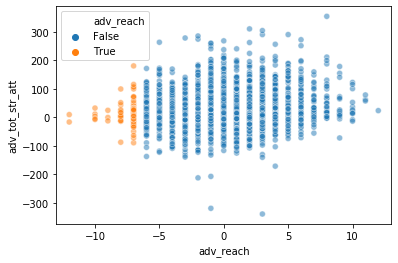

In [95]:
#chceck winner adv total strikes relative to reach
fig, ax =plt.subplots()
sns.scatterplot(y=copy['adv_tot_str_att'], x=copy['adv_reach'], 
                hue=(copy['adv_reach'] <= -np.std(copy['adv_reach'])*2), 
                alpha=.5)
ax.set_xlim(-13,13)
fig.show()

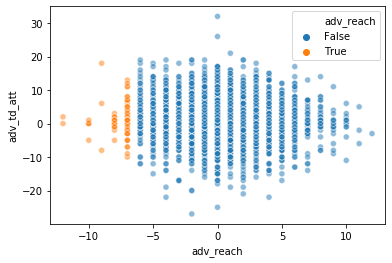

In [96]:
#check adv td att relative to height
fig, ax =plt.subplots()
sns.scatterplot(y=copy['adv_td_att'], x=copy['adv_reach'], 
                hue=(copy['adv_reach'] <= -np.std(copy['adv_reach'])*2), 
                alpha=.5)
ax.set_xlim(-13,13)
fig.show()

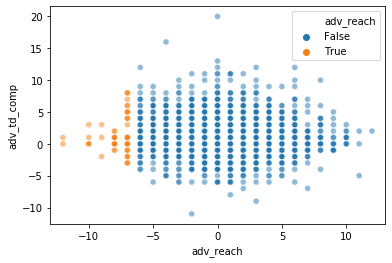

In [97]:
#check adv take downs relative to reach
fig, ax =plt.subplots()
sns.scatterplot(y=copy['adv_td_comp'], x=copy['adv_reach'], 
                hue=(copy['adv_reach'] <= -np.std(copy['adv_reach'])*2), 
                alpha=.5)
ax.set_xlim(-13,13)
fig.show()

In [0]:
#import more tools
from matplotlib.ticker import FuncFormatter

In [0]:
#create reach filter column
copy['reachfilter'] = copy['adv_reach'] <= (np.mean(copy['adv_reach'])-np.std(copy['adv_reach'])*2)

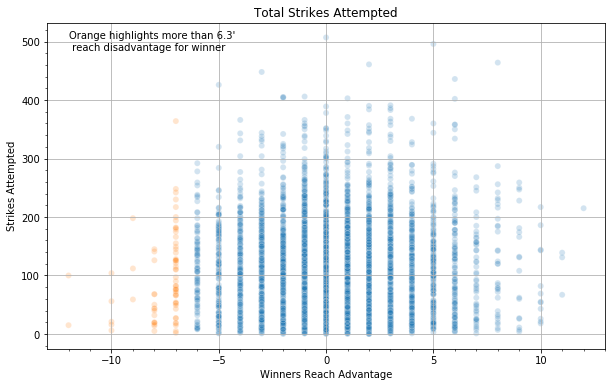

In [104]:
#create presentation graph Total Strikes Attempted
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(y=copy['w_tot_str_att'], x=copy['adv_reach'], alpha=.2, hue=copy['reachfilter'])
ax.set_xlim(-13,13)
ax.set_title('Total Strikes Attempted')
ax.set_ylabel('Strikes Attempted')
ax.set_xlabel('Winners Reach Advantage')
ax.legend().remove()
ax.text(s="Orange highlights more than 6.3' \n reach disadvantage for winner", x=-12, y=485)
ax.minorticks_on()
ax.grid(b=True, which='major')
fig.show();

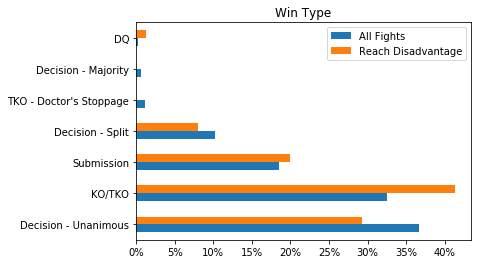

In [105]:
#creat bar chart showing win type comparing all fights to reach advantaged winner fights normalized
p = copy['win_by'][copy['adv_reach'] <= (np.mean(copy['adv_reach'])-np.std(copy['adv_reach'])*2)].value_counts(normalize=True)
w = copy['win_by'].value_counts(normalize=True)
index = ['Decision - Unanimous', 'KO/TKO', 'Submission', 'Decision - Split', 
         "TKO - Doctor's Stoppage", 'Decision - Majority', 'DQ']

gdf = pd.DataFrame({'All Fights': w, 'Reach Disadvantage': p}, index=index)

gdf.plot.barh(title='Win Type').xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)));